In [317]:
from scipy.spatial import ConvexHull
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import imageio
from mpl_toolkits.mplot3d import Axes3D

In [333]:
points = np.random.rand(100,3)
xpoints=points[:,0]
ypoints=points[:,1]
zpoints = points[:,2]

hull = ConvexHull(points)  
neighbours = []

def find_neighbours(points):
    for i in range (len(points)):
        neighbours.append([])

    for i in range (len(hull.simplices)):
            neighbours[hull.simplices[i][0]].append(hull.simplices[i][1])
            neighbours[hull.simplices[i][0]].append(hull.simplices[i][2])

            neighbours[hull.simplices[i][1]].append(hull.simplices[i][0])
            neighbours[hull.simplices[i][1]].append(hull.simplices[i][2])

            neighbours[hull.simplices[i][2]].append(hull.simplices[i][0])
            neighbours[hull.simplices[i][2]].append(hull.simplices[i][1])

    for i in range (len(neighbours)):
        neighbours[i] = list(set(neighbours[i]))
    return neighbours

In [327]:
unit_vecs = []
for i in range (len(points)):
    unit_vecs.append(0)
    
for i in hull.vertices:
    unit_vector = 0
        
    for j in neighbours[i]:
        vector2 = points[j] - points[i]
        mag_2 = np.sqrt(vector2.dot(vector2))
        unit_vector2 = vector2/mag_2
        unit_vector += unit_vector2

    if np.sqrt(unit_vector.dot(unit_vector)) != 0:
        unit_vector = unit_vector / (np.sqrt(unit_vector.dot(unit_vector)))
        unit_vector = unit_vector.tolist()

    unit_vecs[i] = unit_vector
    
    
#print(unit_vecs)

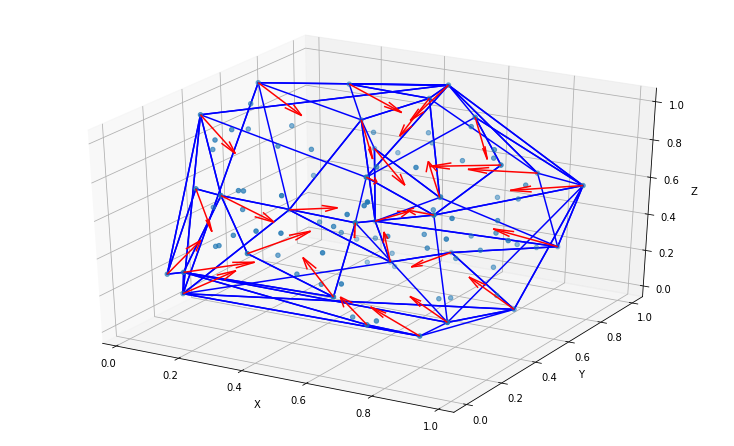

In [328]:
fig = plt.figure(figsize = (10,6))

ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")


ax.scatter(points[:,0], points[:,1], points[:,2], 'r')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], points[simplex,2], 'b-')
#ax.scatter(xpoints[8], ypoints[8], zpoints[8], "g")

lines_to_draw = unit_vecs
us = []
vs = []
ws = []

for i in hull.vertices:
    us.append(unit_vecs[i][0] /5)
    vs.append(unit_vecs[i][1] / 5)
    ws.append(unit_vecs[i][2] / 5)

xs, ys, zs    = points[hull.vertices,0], points[hull.vertices, 1], points[hull.vertices,2]

ax.quiver(xs, ys, zs, us, vs, ws, color = "r")

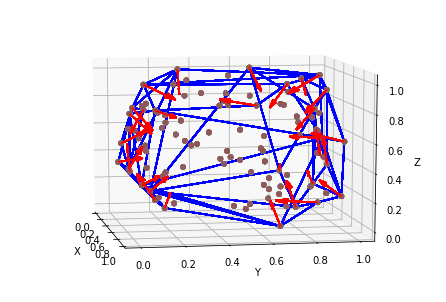

In [329]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
for ii in range(0,360,10):
    ax.view_init(elev=10., azim=ii)
    ax.scatter(points[:,0], points[:,1], points[:,2], 'r')
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], points[simplex,2], 'b-')
    ax.quiver(xs, ys, zs, us, vs, ws, color = "r")
    plt.savefig("quiverazim={}".format(ii))

In [330]:
filenames= ["quiverazim={}.png".format(10*x) for x in range(36)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('quiveroutput100points.gif', images, fps=5)

In [270]:
# fig = plt.figure(figsize = (10,6))

# ax = Axes3D(fig)
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")
# ax.scatter(xpoints, ypoints, zpoints, 'r')
# for simplex in hull.simplices:
#     plt.plot(my_points[simplex, 0], my_points[simplex, 1], my_points[simplex,2], 'b-')
# ax.scatter(xpoints[8], ypoints[8], zpoints[8], "g")

# #plt.plot([my_points[3][0], unit_vecs[3][0]], [my_points[3][1], unit_vecs[3][1]], [my_points[3][2], unit_vecs[3][2]])
# for i in hull.vertices:
#     plt.plot([my_points[i][0], unit_vecs[i][0]], [my_points[i][1], unit_vecs[i][1]], [my_points[i][2], unit_vecs[i][2]])
    

JIT COMPILATION

In [356]:
no_cells = 20
points = np.random.rand(no_cells,3)
xpoints=points[:,0]
ypoints=points[:,1]
zpoints = points[:,2]

hull = ConvexHull(points)

In [357]:
hull = ConvexHull(points)  
neighbours = []
find_neighbours(points)

[[4, 5, 7, 9, 10, 12, 18],
 [18, 6, 15],
 [],
 [],
 [0, 8, 9, 10, 13],
 [0, 9, 18],
 [1, 7, 8, 11, 12, 15, 18],
 [0, 18, 12, 6],
 [4, 6, 10, 11, 12, 13, 16],
 [0, 4, 5, 13, 18],
 [8, 0, 4, 12],
 [8, 16, 6, 15],
 [0, 6, 7, 8, 10],
 [4, 8, 9, 16, 18],
 [],
 [1, 6, 11, 16, 18],
 [8, 11, 13, 15, 18],
 [],
 [0, 1, 5, 6, 7, 9, 13, 15, 16],
 []]

In [361]:
neighbours = np.zeros((no_cells, no_cells))
#print(neighbours)
for i in range (len(hull.simplices)):

    first_number = hull.simplices[i][0]
    second_number = hull.simplices[i][1]
    third_number = hull.simplices[i][2]

    if first_number not in neighbours[second_number]:
        for j in range(no_cells):
            if neighbours[second_number,j] == 0:
                neighbours[second_number, j] = first_number
                break
    if first_number not in neighbours[third_number]:
        for j in range(no_cells):
            if neighbours[third_number,j] == 0:
                neighbours[third_number, j] = first_number
                break
            
    if second_number not in neighbours[first_number]:
        for j in range(no_cells):
            if neighbours[first_number,j] == 0:
                neighbours[first_number, j] = second_number
                break
    if second_number not in neighbours[third_number]:
        for j in range(no_cells):
            if neighbours[third_number,j] == 0:
                neighbours[third_number, j] = second_number
                break
            
    if third_number not in neighbours[first_number]:
        for j in range(no_cells):
            if neighbours[first_number,j] == 0:
                neighbours[first_number, j] = third_number
                break
    if third_number not in neighbours[second_number]:
        for j in range(no_cells):
            if neighbours[second_number,j] == 0:
                neighbours[second_number, j] = third_number
                break
        
print(neighbours)
   

[[18.  5.  7. 10.  4.  9. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [15.  6. 18.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [13.  8. 10.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [18.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 1. 15. 11.  8. 18.  7. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [18.  6. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [11.  6. 13.  4. 16. 10. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [18.  5. 13.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 4.  8. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 8.  6. 15. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [362]:
neighbours = [[2.0, 4.0, 9.0, 7.0], 
              [10.0 4.0 6.0 9.0 1.0 ], 
              [], 
              [5.0 10.0 2.0 7.0 1.0 ], 
              [10.0 4.0 6.0 9.0 7.0 ],
              [5.0 10.0 9.0 2.0 ], 
              [5.0 4.0 9.0 1.0 ],
              [],
              [6.0 5.0 2.0 7.0 1.0 ],
              [5.0 4.0 6.0 2.0]]

SyntaxError: invalid syntax (<ipython-input-362-85f908e6b35f>, line 2)

In [364]:
points =  [[-1.698923256640036, 0.02206604981466853, -0.9389357583532263],
  [0.9724388764368079, 1.8404033873885028, -0.3207422831879576],
  [-0.2534012312936609, -1.2902900806574538, 1.0982183622259702],
  [-1.9156357624040563, 0.671717854257313, 0.8235882446275129],
  [0.28182518482754304, -1.751634398683871, 1.6346586246759802], 
  [1.2452191255241676, -1.6373762416840867, -1.1419589870580191],
  [-1.4040009368055104, -0.4827766605551851, -0.3128302734160284],
  [0.8355772369806367, 1.241935098024748, 1.000111256747842],
  [-0.8915733440220555, -0.6497085850893738, -1.1457863696879018], 
  [1.2700929629402538, 1.5896814164334545, 1.6945823283926416]]

In [365]:
hull = ConvexHull(points)  
neighbours = []
find_neighbours(points)

[[8, 1, 3, 6],
 [0, 3, 5, 8, 9],
 [],
 [0, 1, 4, 6, 9],
 [3, 5, 6, 8, 9],
 [8, 9, 4, 1],
 [8, 0, 3, 4],
 [],
 [0, 1, 4, 5, 6],
 [1, 3, 4, 5]]